# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime
#import datetime
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 609


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?id=524901"
unit = "imperial"
query_url = f"{url}&appid={weather_api_key}&units={unit}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = "http://api.openweathermap.org/data/2.5/weather"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(query_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | muros
Processing Record 2 of Set 1 | castro
Processing Record 3 of Set 1 | pacifica
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | barrow
Processing Record 6 of Set 1 | kahului
Processing Record 7 of Set 1 | san blas
Processing Record 8 of Set 1 | normandin
Processing Record 9 of Set 1 | avarua
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | dikson
Processing Record 12 of Set 1 | vaini
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | achisay
City not found. Skipping...
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | bolungarvik
City not found. Skipping...
Processing Record 17 of Set 1 | saskylakh
Processing Record 18 of Set 1 | georgetown
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | colac
Processing Record 21 of Set 1 | babu
Processing Record 22 of Set 1 | victoria
Processin

Processing Record 37 of Set 4 | peniche
Processing Record 38 of Set 4 | brae
Processing Record 39 of Set 4 | xinpu
Processing Record 40 of Set 4 | dolores
Processing Record 41 of Set 4 | bougouni
Processing Record 42 of Set 4 | karpathos
Processing Record 43 of Set 4 | meyungs
City not found. Skipping...
Processing Record 44 of Set 4 | ganzhou
Processing Record 45 of Set 4 | solnechnyy
Processing Record 46 of Set 4 | college
Processing Record 47 of Set 4 | avera
Processing Record 48 of Set 4 | wajir
Processing Record 49 of Set 4 | tual
Processing Record 0 of Set 5 | havelock
Processing Record 1 of Set 5 | galgani
City not found. Skipping...
Processing Record 2 of Set 5 | marang
Processing Record 3 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 4 of Set 5 | nortelandia
Processing Record 5 of Set 5 | hithadhoo
Processing Record 6 of Set 5 | luderitz
Processing Record 7 of Set 5 | pitimbu
Processing Record 8 of Set 5 | jalu
Processing Record 9 of Set 5 | palabuhanr

City not found. Skipping...
Processing Record 25 of Set 8 | le pradet
Processing Record 26 of Set 8 | pinotepa nacional
Processing Record 27 of Set 8 | yuncheng
Processing Record 28 of Set 8 | grasse
Processing Record 29 of Set 8 | buqayq
City not found. Skipping...
Processing Record 30 of Set 8 | moron
Processing Record 31 of Set 8 | pozoblanco
Processing Record 32 of Set 8 | erdaojiang
Processing Record 33 of Set 8 | taltal
Processing Record 34 of Set 8 | smithers
Processing Record 35 of Set 8 | guerrero negro
Processing Record 36 of Set 8 | badiraguato
Processing Record 37 of Set 8 | primorka
Processing Record 38 of Set 8 | ilhabela
Processing Record 39 of Set 8 | dunedin
Processing Record 40 of Set 8 | mar del plata
Processing Record 41 of Set 8 | chimbote
Processing Record 42 of Set 8 | tarudant
City not found. Skipping...
Processing Record 43 of Set 8 | dubbo
Processing Record 44 of Set 8 | bagdarin
Processing Record 45 of Set 8 | port moresby
Processing Record 46 of Set 8 | abye

Processing Record 12 of Set 12 | ambon
Processing Record 13 of Set 12 | brumado
Processing Record 14 of Set 12 | cap malheureux
Processing Record 15 of Set 12 | novyy urengoy
Processing Record 16 of Set 12 | mayor pablo lagerenza
Processing Record 17 of Set 12 | nioro
Processing Record 18 of Set 12 | yerbogachen
Processing Record 19 of Set 12 | sambava
Processing Record 20 of Set 12 | ambagarh chauki
Processing Record 21 of Set 12 | kurkino
Processing Record 22 of Set 12 | thinadhoo
Processing Record 23 of Set 12 | zafra
Processing Record 24 of Set 12 | kamenka
Processing Record 25 of Set 12 | guapi
Processing Record 26 of Set 12 | bourail
Processing Record 27 of Set 12 | quelimane
Processing Record 28 of Set 12 | mehamn
Processing Record 29 of Set 12 | moses lake
Processing Record 30 of Set 12 | madera
Processing Record 31 of Set 12 | anamur
Processing Record 32 of Set 12 | poletayevo
Processing Record 33 of Set 12 | nautla
Processing Record 34 of Set 12 | sungaipenuh
Processing Recor

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          557
Lat           557
Lng           557
Max Temp      557
Humidity      557
Cloudiness    557
Wind Speed    557
Country       557
Date          557
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,muros,42.7762,-9.0603,43.84,86,3,6.53,ES,1675299196
1,castro,-24.7911,-50.0119,63.28,95,55,2.21,BR,1675299198
2,pacifica,37.6138,-122.4869,57.72,54,75,3.00,US,1675299199
3,mataura,-46.1927,168.8643,79.63,52,100,1.81,NZ,1675298401
4,barrow,71.2906,-156.7887,-7.58,77,0,21.85,US,1675298378


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,muros,42.7762,-9.0603,43.84,86,3,6.53,ES,1675299196
1,castro,-24.7911,-50.0119,63.28,95,55,2.21,BR,1675299198
2,pacifica,37.6138,-122.4869,57.72,54,75,3.00,US,1675299199
3,mataura,-46.1927,168.8643,79.63,52,100,1.81,NZ,1675298401
4,barrow,71.2906,-156.7887,-7.58,77,0,21.85,US,1675298378


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

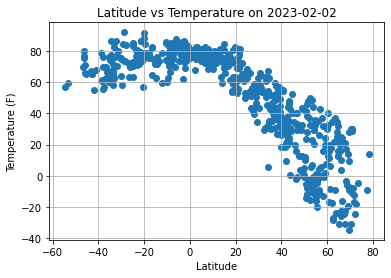

In [8]:
# Build scatter plot for latitude vs. temperature
endRunDate = city_data_df["Date"].max()
runDate = datetime.utcfromtimestamp(endRunDate).strftime('%Y-%m-%d')
# YOUR CODE HERE
x = city_data_df["Lat"]
y = city_data_df["Max Temp"]
plt.scatter(x,y)
# Incorporate the other graph properties
plt.grid()
# YOUR CODE HERE
plt.title(f"Latitude vs Temperature on {runDate}")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

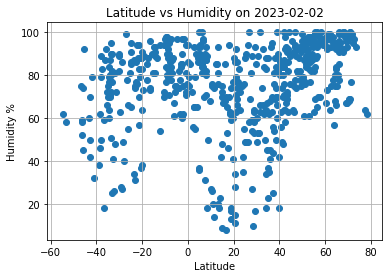

In [9]:
# Build the scatter plots for latitude vs. humidity
endRunDate = city_data_df["Date"].max()
runDate = datetime.utcfromtimestamp(endRunDate).strftime('%Y-%m-%d')
# YOUR CODE HERE
x = city_data_df["Lat"]
y = city_data_df["Humidity"]
plt.scatter(x,y)
# Incorporate the other graph properties
plt.grid()
# YOUR CODE HERE
plt.title(f"Latitude vs Humidity on {runDate}")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

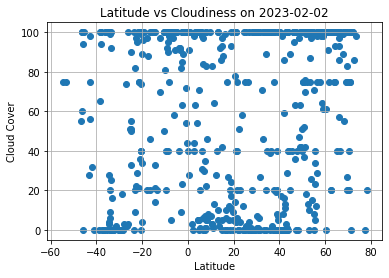

In [10]:
# Build the scatter plots for latitude vs. cloudiness
endRunDate = city_data_df["Date"].max()
runDate = datetime.utcfromtimestamp(endRunDate).strftime('%Y-%m-%d')
# YOUR CODE HERE
x = city_data_df["Lat"]
y = city_data_df["Cloudiness"]
plt.scatter(x,y)
# Incorporate the other graph properties
plt.grid()
# YOUR CODE HERE
plt.title(f"Latitude vs Cloudiness on {runDate}")
plt.xlabel("Latitude")
plt.ylabel("Cloud Cover")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

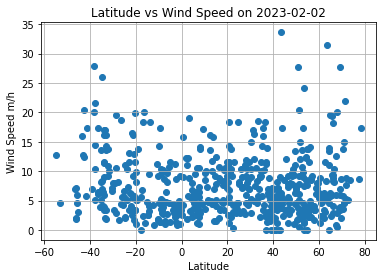

In [11]:
# Build the scatter plots for latitude vs. wind speed
endRunDate = city_data_df["Date"].max()
runDate = datetime.utcfromtimestamp(endRunDate).strftime('%Y-%m-%d')
# YOUR CODE HERE
x = city_data_df["Lat"]
y = city_data_df["Wind Speed"]
plt.scatter(x,y)
# Incorporate the other graph properties
plt.grid()
# YOUR CODE HERE
plt.title(f"Latitude vs Wind Speed on {runDate}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed m/h")
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    print(f'The r-square is {rvalue}')
    print(line_eq)
    plt.annotate(line_eq,(regEQplotX,regEQplotY),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(f'{y_label}')
    plt.grid()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] > 0]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,muros,42.7762,-9.0603,43.84,86,3,6.53,ES,1675299196
2,pacifica,37.6138,-122.4869,57.72,54,75,3.00,US,1675299199
4,barrow,71.2906,-156.7887,-7.58,77,0,21.85,US,1675298378
5,kahului,20.8947,-156.4700,80.96,79,40,11.50,US,1675298732
6,san blas,21.5167,-105.2667,68.92,86,6,2.13,MX,1675299201


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,castro,-24.7911,-50.0119,63.28,95,55,2.21,BR,1675299198
3,mataura,-46.1927,168.8643,79.63,52,100,1.81,NZ,1675298401
8,avarua,-21.2078,-159.7750,75.25,94,75,9.22,CK,1675298698
9,ushuaia,-54.8000,-68.3000,56.86,62,75,12.66,AR,1675299203
11,vaini,-21.2000,-175.2000,86.16,70,75,16.11,TO,1675299204


###  Temperature vs. Latitude Linear Regression Plot

The r-square is -0.8670655929423855
y = -1.31x + 88.46


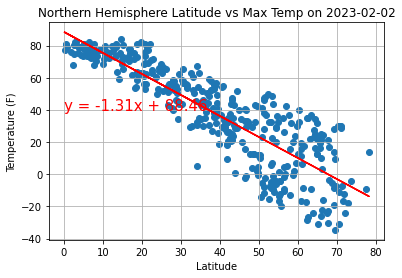

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
#tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 40
#label the y axis
y_label = "Temperature (F)"
#give the title
plt.title(f'Northern Hemisphere Latitude vs Max Temp on {runDate}')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
#show the plot
plt.show()

The r-square is 0.4671967904281643
y = 0.28x + 79.99


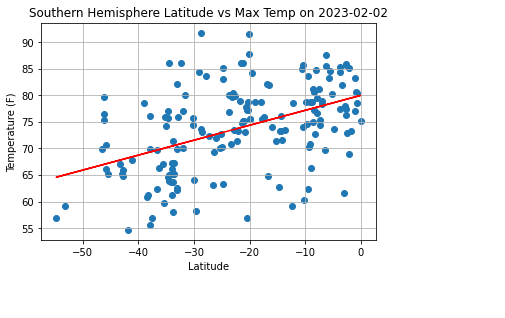

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
#tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 40
#label the y axis
y_label = "Temperature (F)"
#give the title
plt.title(f'Southern Hemisphere Latitude vs Max Temp on {runDate}')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
#show the graph
plt.show()

**Discussion about the linear relationship:** There a week positve correlation between latitude and max temp in the southern hemisphere. The farther you go south from the equator, it will be colder.

### Humidity vs. Latitude Linear Regression Plot

The r-square is 0.39634350623953174
y = 0.42x + 59.33


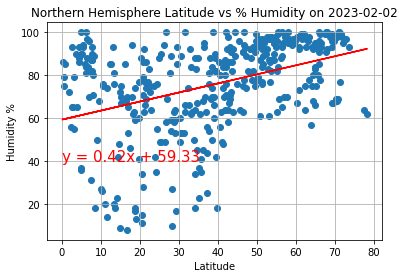

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
#tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 40
#label the y axis
y_label = "Humidity %"
#give the title
plt.title(f'Northern Hemisphere Latitude vs % Humidity on {runDate}')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
#show the graph
plt.show()

The r-square is 0.3865314146549801
y = 0.51x + 86.02


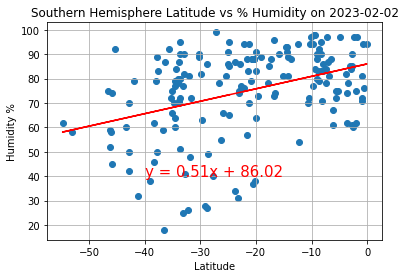

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
#tweak where the equation appears on the plot
regEQplotX = -40
regEQplotY = 40
#label the y axis
y_label = "Humidity %"
#give the title
plt.title(f'Southern Hemisphere Latitude vs % Humidity on {runDate}')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
#show the graph
plt.show()

**Discussion about the linear relationship:** There is a week relationship between humidit and latitude. It is more hymid close to the equator.

### Cloudiness vs. Latitude Linear Regression Plot

The r-square is 0.3118356874801693
y = 0.65x + 31.27


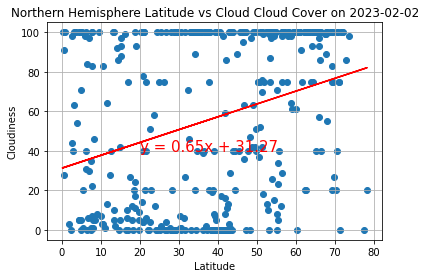

In [24]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
#tweak where the equation appears on the plot
regEQplotX = 20
regEQplotY = 40
#label the y axis
y_label = "Cloudiness"
#give the title
plt.title(f'Northern Hemisphere Latitude vs Cloud Cloud Cover on {runDate}')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
#display the graph
plt.show()

The r-square is 0.3153917108742668
y = 0.94x + 79.69


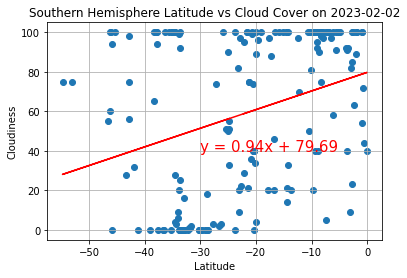

In [27]:
# Southern Hemisphere Cloudiness vs. Latitude
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
#tweak where the equation appears on the plot
regEQplotX = -30
regEQplotY = 40
#label the y axis
y_label = "Cloudiness"
#give the title
plt.title(f'Southern Hemisphere Latitude vs Cloud Cover on {runDate}')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
#display the graph
plt.show()

### Wind Speed vs. Latitude Linear Regression Plot

The r-square is 0.03507211472621297
y = 0.01x + 6.88


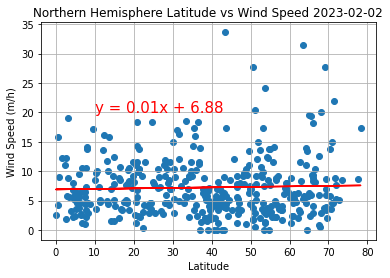

In [33]:
# Northern hemispher
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
#tweak where the equation appears on the plot
regEQplotX = 10
regEQplotY = 20
#label the y axis
y_label = "Wind Speed (m/h)"
#give the title
plt.title(f'Northern Hemisphere Latitude vs Wind Speed {runDate}')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
#display the graph
plt.show()

The r-square is -0.3314634224570632
y = -0.14x + 4.61


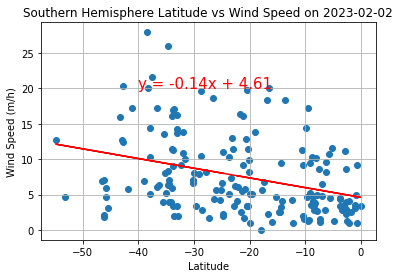

In [35]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
#tweak where the equation appears on the plot
regEQplotX = -40
regEQplotY = 20
#label the y axis
y_label = "Wind Speed (m/h)"
#give the title
plt.title(f'Southern Hemisphere Latitude vs Wind Speed on {runDate}')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
#display the graph
plt.show()

**Discussion about the linear relationship:** There is e negative weak correlation between latitude and wind speen in the southern hemispher. It is more windy farther south than close to the equator.